In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')
USAhousing.drop('Address', axis=1, inplace=True)
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


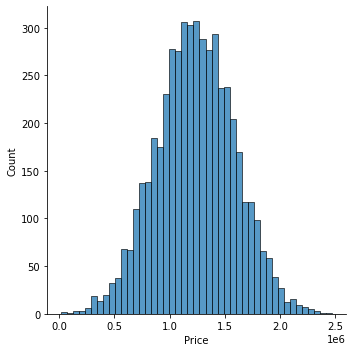

In [3]:
sns.displot(USAhousing['Price'])

<AxesSubplot:>

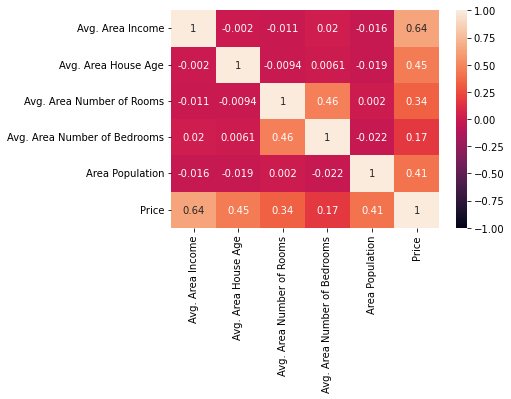

In [5]:
sns.heatmap(USAhousing.corr(),vmin=-1, vmax=1, annot=True)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

RANDOM_SEED = 2021
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.4.0


In [8]:
X = USAhousing.drop('Price', axis=1)
y = USAhousing[['Price']]

scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)


In [9]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [10]:
X_scaled.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.686822,0.441986,0.501502,0.464444,0.329942
1,0.683521,0.488538,0.464501,0.242222,0.575968
2,0.483737,0.468609,0.701350,0.695556,0.528582
3,0.506630,0.660956,0.312430,0.280000,0.491549
4,0.469223,0.348556,0.611851,0.495556,0.376988


In [19]:
def build_model(activation='relu', learning_rate=0.01):
    #Create a sequential model (with three layers - last one is output)
    model = Sequential()
    model.add(Dense(16, input_dim=5, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation='relu'))

    #Compile the model
    #Define the loss function, the otimizer and metrics to be used
    model.compile(
        loss='mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse'])
    
    return model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=RANDOM_SEED)

In [16]:
TUNING_DICT = {
    'activation' : ['relu', 'sigmoid'],
    'learning_rate' : [0.01, 0.001]
}

In [20]:
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

model = KerasRegressor(build_fn=build_model, epochs=20, batch_size=32)
grid_search = GridSearchCV(estimator = model,
                           param_grid = TUNING_DICT, 
                           cv = kf,
                           scoring = 'neg_mean_absolute_error',
                           refit = 'True',
                           verbose = 1)
grid_search.fit(X_train, y_train, validation_split=0.2, verbose=1)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Epoch 1/20


2021-11-25 10:10:34.793415: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-25 10:10:34.809396: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2500615000 Hz


80/80 [==============================] - 1s 4ms/step - loss: 0.1016 - mae: 0.1016 - mse: 0.0183 - val_loss: 0.0400 - val_mae: 0.0400 - val_mse: 0.0024
Epoch 2/20
80/80 [==============================] - 0s 2ms/step - loss: 0.0421 - mae: 0.0421 - mse: 0.0027 - val_loss: 0.0360 - val_mae: 0.0360 - val_mse: 0.0020
Epoch 3/20
80/80 [==============================] - 0s 2ms/step - loss: 0.0365 - mae: 0.0365 - mse: 0.0021 - val_loss: 0.0368 - val_mae: 0.0368 - val_mse: 0.0021
Epoch 4/20
80/80 [==============================] - 0s 2ms/step - loss: 0.0364 - mae: 0.0364 - mse: 0.0021 - val_loss: 0.0352 - val_mae: 0.0352 - val_mse: 0.0019
Epoch 5/20
80/80 [==============================] - 0s 2ms/step - loss: 0.0378 - mae: 0.0378 - mse: 0.0022 - val_loss: 0.0451 - val_mae: 0.0451 - val_mse: 0.0030
Epoch 6/20
80/80 [==============================] - 0s 2ms/step - loss: 0.0386 - mae: 0.0386 - mse: 0.0023 - val_loss: 0.0371 - val_mae: 0.0371 - val_mse: 0.0021
Epoch 7/20
80/80 [=====================

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fede066dd90>,
             param_grid={'activation': ['relu', 'sigmoid']}, refit='True',
             scoring='neg_mean_absolute_error', verbose=1)

In [21]:
#summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.218755 using {'activation': 'relu'}
-0.218755 (0.225999) with: {'activation': 'relu'}
-0.312995 (0.225177) with: {'activation': 'sigmoid'}


In [24]:
#Our best model (remember we set refit=True?)
best_mlp_model = grid_search.best_estimator_

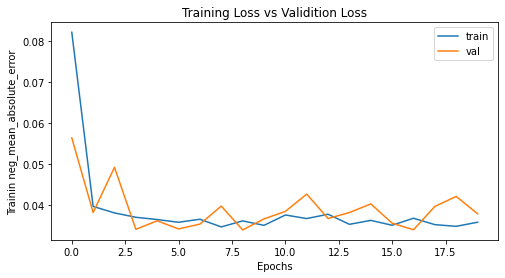

In [26]:
#Did the model overfit?
def plot_learning_curve(history, metric='neg_mean_absolute_error'):
    plt.figure(figsize=(8,4))
    plt.title('Training Loss vs Validition Loss')
    plt.plot(history.epoch, history.history['loss'], label='train')
    plt.plot(history.epoch, history.history['val_loss'], label='val')
    plt.ylabel('Trainin ' + metric)
    plt.xlabel('Epochs')
    plt.legend()

plot_learning_curve(best_mlp_model.model.history, metric='neg_mean_absolute_error')

In [27]:
#Obtain predictions
predictions = best_mlp_model.predict(X_test)
predictions = predictions.reshape(predictions.shape[0], 1)
predictions[:5]

array([[0.5764222 ],
       [0.3243611 ],
       [0.25276327],
       [0.61367714],
       [0.28457654]], dtype=float32)

In [28]:
#And now let's unscale the model's predictions to see real prices!
predictions_unscaled = scaler_y.inverse_transform(predictions)
predictions_unscaled[:5]

array([[1429975.5 ],
       [ 811637.6 ],
       [ 635999.06],
       [1521366.5 ],
       [ 714041.06]], dtype=float32)

In [31]:
#Let's unscale y_test to get the original values
y_test_unscaled = scaler_y.inverse_transform(y_test)
y_test_unscaled[:5]

array([[1409892.08977612],
       [ 889385.90158426],
       [ 635429.23051901],
       [1613414.23305073],
       [ 774491.65328819]])

In [29]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.036446280955102696
MSE: 0.0021054155207763346
RMSE: 0.045884807080081906


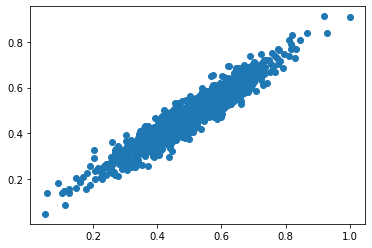

In [33]:
plt.scatter(y_test, predictions)

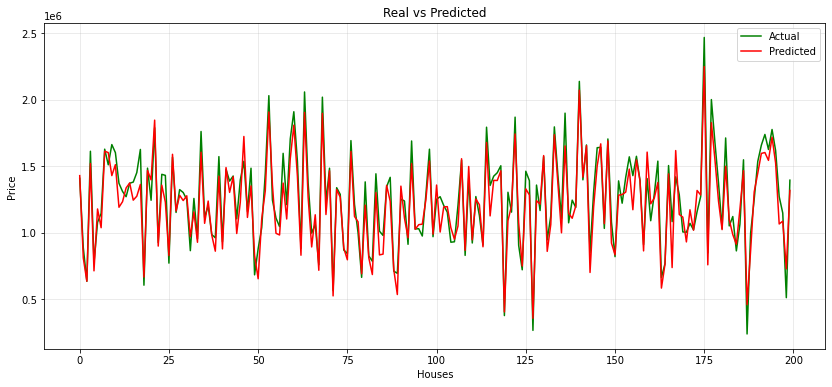

In [35]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test_unscaled[:limit], color='green', label='Actual')
    plt.plot(predictions_unscaled[:limit], color='red', label='Predicted')
    plt.grid(alpha=0.3)
    plt.xlabel('Houses')
    plt.ylabel('Price')
    plt.title('Real vs Predicted')
    plt.legend()
    plt.show()

#Let's limit to 200 comparasions for better visualization
real_predicted_viz(200)